# Proyek Analisis Data: Bike Sharing
- **Nama:** Vania Rachmawati Dewi
- **Email:** vaniardewi@gmail.com
- **ID Dicoding:** vaniard

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda oleh pelanggan?
- Bagaimana pengaruh cuaca terhadap peningkatan atau penurunan jumlah pengguna sepeda berdasarkan tipe pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_day.shape

(731, 16)

Tabel day terdiri dari 731 baris dan 16 kolom.

In [6]:
df_hour.shape

(17379, 17)

Tabel hour terdiri dari 17.379 baris dan 17 kolom.

**Insight:**
- Kedua dataset, `df_day` dan `df_hour` berisi informasi terkait penyewaan sepeda termasuk jumlah pengguna casual dan registered.
- `df_day` menyajikan data harian, sedangkan `df_hour` menyajikan data per jam.
- Pada `df_hour` memiliki kolom tambahan `hr` yang menunjukkan jam dalam sehari.

### Assessing Data

**Mengecek Tipe Data**

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



*   `df_day` memiliki 731 baris dan 16 kolom.
*   Sebagian besar kolom memiliki tipe data numerik.
*   Kolom `dteday` memiliki tipe data object. Untuk analisis berbasis waktu, kolom tersebut perlu dikonversi ke tipe data `datetime`.





In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



*   `df_hour` memiliki 17.379 baris dan 17 kolom.
*   Sebagian besar kolom memiliki tipe data numerik.
*   Kolom `dteday` memiliki tipe data object. Sama seperti `df_day`, kolom tersebut juga perlu dilakukan perbaikan ke tipe data `datetime`.





**Missing Value**

In [9]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat missing value pada data `df_day`.

In [10]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak terdapat juga missing value pada data `df_hour`.

**Duplikasi Data**

In [11]:
print("Jumlah Duplikasi :", df_day.duplicated().sum())

Jumlah Duplikasi : 0


Tidak terdapat duplikasi data pada dataset day.

In [12]:
print("Jumlah Duplikasi :", df_hour.duplicated().sum())

Jumlah Duplikasi : 0


Tidak terdapat duplikasi data pada dataset hour.

**Nilai Statistika**

In [13]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- season : rata-rata 2.49, dengan nilai minimum 1 dan maksimum 4, menunjukkan cakupan semua musim (semi, panas, gugur, dingin).
- year : Nilai minimum 0 dan maksimum 1, menunjukkan data mencakup dua tahun yaitu 2011 dan 2012.
- month : Mencakup semua bulan dalam setahun.
- weekday : Menunjukkan hari dalam seminggu.
- weathersit : Menunjukkan kondisi cuaca yang berbeda (cerah, mendung, hujan ringan / salju ringan).
- temp : Rata-rata sekitar 0.495 atau sekitar 12.3 derajat Celcius - 20.3 derajat Celcius.
- atemp : rata-rata 0.474.
- hum : Rata-rata 0.627.
- casual : Rata-rata 848, dengan penyewaan harian minimum 2 dan maksimum 3.410.
- registered : Rata-rata 3.656 jauh lebih tinggi dari pengguna casual. Penyewa harian minimum 20 dan maksimum 6.946. Pengguna terdaftar merupakan mayoritas dari total penyewaan.
- cnt : Rata-rata total penyewaan harian adalah 4.504 dengan minimum 22 dan maksimum 8.714. Pada standar deviasi (1.937) menunjukkan variasi yang cukup besar dari hari ke hari.

In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Secara umum, kedua dataset, `df_day` dan `df_hour`, memiliki kualitas data yang baik.
- Tidak ditemukan adanya *missing values* maupun duplikasi data dari kedua dataset.
- Perlu dilakukan perbaikan tipe data pada kolom `dteday` yang masih bertipe object di kedua dataset. Kolom tersebut perlu dikonversi ke tipe data `datetime` agar dapat digunakan dalam analisis berbasis waktu.

### Cleaning Data

**Perbaikan Tipe Data**

In [15]:
columns_datetime = ['dteday']

for column in columns_datetime :
  df_day[column] = pd.to_datetime(df_day[column])
  df_hour[column] = pd.to_datetime(df_hour[column])

In [16]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Sekarang kolom `dteday` sudah berubah tipe data nya menjadi `datetime`.

**Menghapus Kolom yang Tidak Digunakan**

In [18]:
drop_columns_day = ['instant', 'windspeed']

for i in df_day.columns :
  if i in drop_columns_day :
    df_day.drop(labels=i, axis=1, inplace=True)

In [19]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**Mengubah Nama Kolom**

In [20]:
df_day.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather_condition',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)

In [21]:
df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**Mengubah Data Numerikal menjadi Data Kategorikal**

In [22]:
df_day['season'] = df_day['season'].map({
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
})

df_day['weekday'] = df_day['weekday'].map({
    0 : 'sunday',
    1 : 'monday',
    2 : 'tuesday',
    3 : 'wednesday',
    4 : 'thursday',
    5 : 'friday',
    6 : 'saturday'
})

df_day['month'] = df_day['month'].map({
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
})

df_day['weather_condition'] = df_day['weather_condition'].map({
    1 : 'clear',
    2 : 'mist',
    3 : 'light rain',
    4 : 'heavy rain'
})

In [23]:
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['season'] = df_day.season.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weather_condition'] = df_day.weather_condition.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')

In [24]:
df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,casual,registered,count
0,2011-01-01,spring,0,january,0,saturday,0,mist,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,spring,0,january,0,sunday,0,mist,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,spring,0,january,0,monday,1,clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,spring,0,january,0,tuesday,1,clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,spring,0,january,0,wednesday,1,clear,0.226957,0.229270,0.436957,82,1518,1600


**Insight :**
- Perbaikan Tipe Data : Kolom `dteday` di kedua dataframe (`df_day` dan `df_hour`) berhasil dikonversi ke tipe data `datetime`, yang memungkinkan analisis berbasis waktu.
- Penghapusan Kolom : Kolom `instant` dan `windspeed` telah dihapus dari `df_day` untuk menyederhanakan dataset.
- Penggantian Nama Kolom : Beberapa kolom di `df_day` telah diganti namanya (`dteday` ke `dateday`, `yr` ke `year`, `mnth` ke `month`, `weathersit` ke `weather_condition`, `temp` ke `temperature`, `hum` ke `humidity`, `cnt` ke `count`) agar lebih mudah dipahami.
- Konversi Nilai Numerik ke Kategorikal : Nilai numerik pada kolom `season`, `weekday`, `month`, dan `weather_condition` di `df_day` telah dipetakan ke label string yang lebih deskriptif, meningkatkan keterbacaan data.
- Pengubahan Tipe Data Menjadi Kategori : Kolom `year`, `month`, `season`, `weekday`, `holiday`, `weather_condition`, dan `workingday` di `df_day` telah diubah tipenya menjadi `category` untuk optimasi memori dan penanganan yang tepat dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore Data Day

**Penyewaan sepeda berdasarkan bulan**

In [25]:
df_day.groupby(by='month').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
month                                     
april      7460   795  4484.900000  269094
august     7865  1115  5664.419355  351194
december   6606   441  3403.806452  211036
february   5062  1005  2655.298246  151352
january    4521   431  2176.338710  134933
july       8173  3285  5563.677419  344948
june       8120  3767  5772.366667  346342
march      8362   605  3692.258065  228920
may        8294  2633  5349.774194  331686
november   6852  1495  4247.183333  254831
october    8156    22  5199.225806  322352
september  8714  1842  5766.516667  345991

- Bulan September dan Juni menunjukkan rata-rata penyewaan harian tertinggi sekitar 5.766 dan 5.772 serta total penyewaan bulanan yang sangat tinggi. Bulan Agustus dan Juli juga menunjukkan jumlah penyewaan yang sangat tinggi, mengindikasi bahwa musim panas (summer) dan awal musim gugur (fall) adalah periode puncak untuk penyewaan sepeda.
- Bulan Januari memiliki rata-rata penyewaan harian dan total penyewaan bulanan terendah, diikuti oleh Februari dan Desember. Hal ini menunjukkan bahwa musim dingin (winter) adalah periode dengan aktivitas penyewaan sepeda paling sedikit.
- Pada bulan Januari dan September terdapat variasi yang signifikan dalam jumlah penyewaan sepeda.
- Bulan Oktober memiliki nilai minimum count sangat rendah yaitu 22 yang bisa mengindikasikan hari tertentu dengan kondisi yang sangat tidak mendukung.

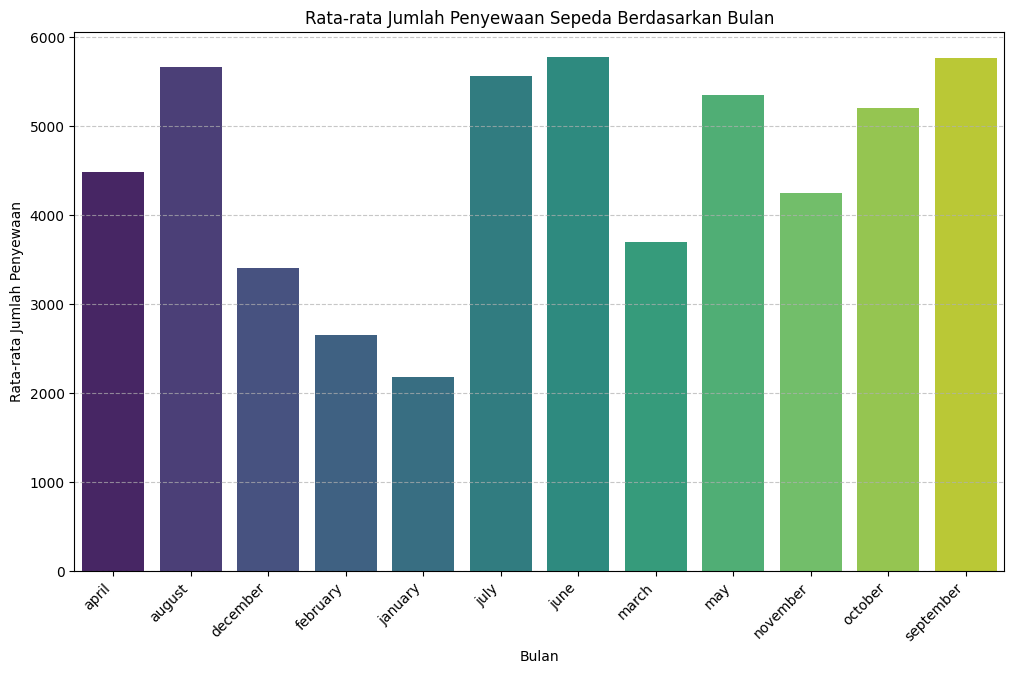

In [26]:
plt.figure(figsize=(12, 7))
sns.barplot(x='month', y='count', data=df_day.groupby('month')['count'].mean().reset_index(), palette='viridis')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Penyewaan sepeda berdasarkan cuaca**



In [27]:
df_day.groupby(by='weather_condition').agg({
    'count' : ['max', 'min', 'mean', 'sum']
})

count                           
                    max  min         mean      sum
weather_condition                                 
clear              8714  431  4876.786177  2257952
light rain         4639   22  1803.285714    37869
mist               8362  605  4035.862348   996858

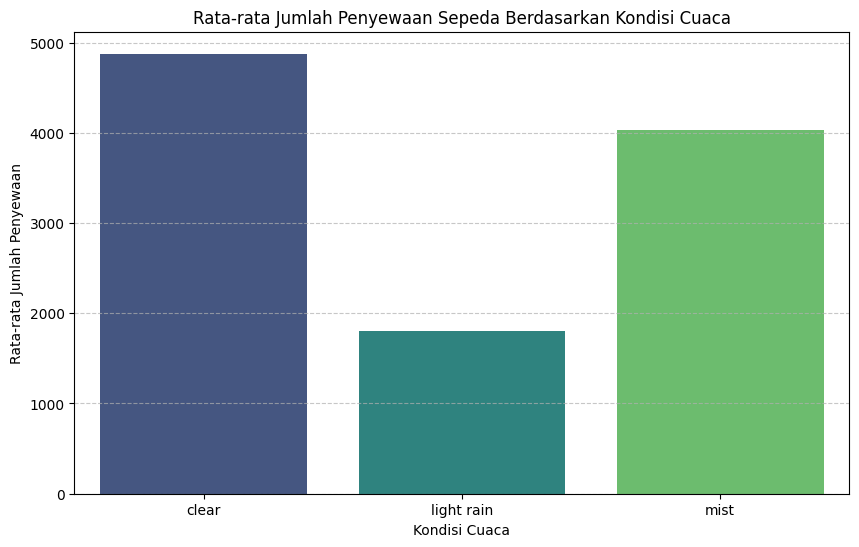

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='count', data=df_day.groupby('weather_condition')['count'].mean().reset_index(), palette='viridis')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Kondisi cuaca cerah (clear) memiliki rata-rata penyewaan tertinggi sekitar 4.876 dengan total 2.257.952 dibandingkan kondisi cuaca lainnya. Hal ini menunjukkan bahwa pengguna sepeda sangat menyukai cuaca cerah untuk menyewa sepeda.
- Kondisi cuaca berkabur (mist) juga menunjukkan jumlah penyewaan yang tinggi, dengan rata-rata 4.035 dan total 996.858. Hal tersebut mengindikasi bahwa cuaca sedikit berawan atau berkabut tidak terlalu menghalangi aktivitas penyewaan sepeda.
- Kondisi cuaca hujan ringan (light rain) memiliki rata-rata penyewaan paling rendah yaitu 1.803 dan total penyewaan yang sangat kecil 37.869 dibandingkan dua kondisi lainnya. Hal ini jelas menunjukkan bahwa hujan, meskipun ringan, secara signifikan mengurangi minat orang untuk menyewa sepeda.

**Penyewaan sepeda berdasarkan season (musim)**

In [29]:
df_day.groupby(by='season').agg({
    'casual' : 'mean', 'registered' :'mean', 'count' : ['max', 'min' ,'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
fall    1202.611702  4441.691489  8714  1115  5644.303191
spring   334.928177  2269.204420  7836   431  2604.132597
summer  1106.097826  3886.233696  8362   795  4992.331522
winter   729.112360  3999.050562  8555    22  4728.162921

- Musim gugur (fall) merupakan musim dengan rata-rata total penyewa sepeda tertinggi yaitu sekitar 5.644. Pengguna casual dan registered keduanya menunjukkan rata-rata penyewaan yang tinggi di musim ini, dengan rata-rata casual 1.202 dan registered 4.441.
- Musing panas (summer) menempati posisi kedua dalam rata-rata total penyewaan sekitar 4.992. Seperti musim gugur, musim panas juga populer di kalangan kedua jenis pengguna.
- Musim dingin (winter) memiliki rata-rata total penyewaan yang cukup tinggi sekitar 4.728, namun data menunjukkan variasi yang signifikan, dengan nilai minimum yang sangat rendah (22) dan nilai maksimum yang tinggi (8.555).
- Musim semi (spring) merupakan musim dengan rata-rata total penyewaan sepeda terendah sekitar 2.604. Baik pengguna casual maupun registered menunjukkan aktivitas penyewaan yang jauh lebih rendah dibandingkan musim lainnya.

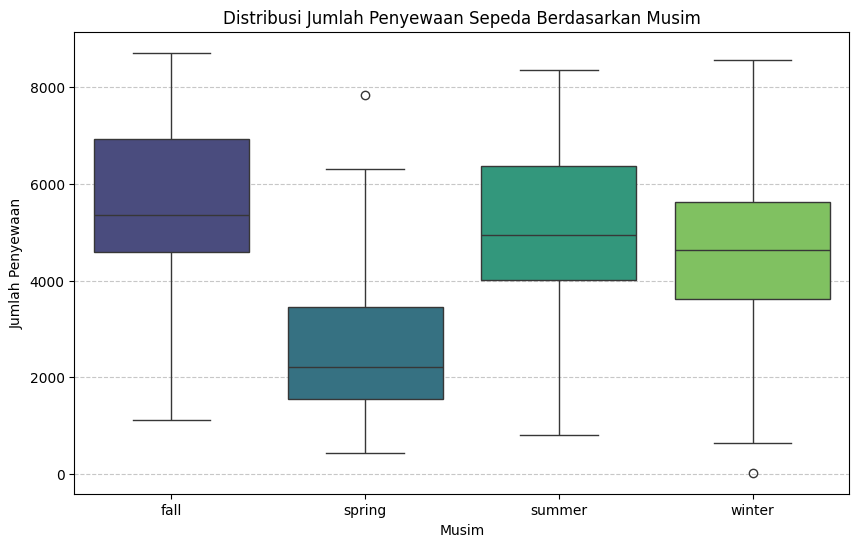

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df_day, palette='viridis')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Musim gugur (fall) dan musim panas (summer), keduanya menunjukkan kepadatan penyewaan yang tinggi pada jumlah yang lebih tinggi. Ini berarti sebagian besar hari di musim ini memiliki jumlah penyewaan sepeda yang sangat banyak.
- Musim semi (spring) memiliki kepadatan penyewaan yang lebih rendah dan terkonsentrasi pada jumlah yang lebih sedikit. Itu menandakan penyewaan sepeda paling jarang dan dalam jumlah yang lebih kecil terjadi di musim semi.
- Musim dingin (winter) menunjukkan distribusi yang lebih luas. Ada kepadatan penyewaan yang signifikan pada jumlah menengah hingga tertinggi, akan tetapi juga terdapat hari-hari dengan jumlah penyewaan yang sangat rendah. Hal ini mencerminkan kondisi cuaca yang lebih tidak stabil atau ekstrem di musim dingin yang bisa sangat mempengaruhi penyewaan sepeda.

**Perbandingan penyewaan sepeda pada hari kerja dan akhir pekan**

In [35]:
df_day.groupby(by='day_type').agg({
    'count': ['max', 'min', 'mean']
})

count                  
           max  min         mean
day_type                        
weekday   8362   22  4550.566219
weekend   8714  605  4389.685714

In [33]:
df_day.groupby(by='weekday').agg({
    'count':['max', 'min', 'mean']
})

count                   
            max   min         mean
weekday                           
friday     8362  1167  4690.288462
monday     7525    22  4338.123810
saturday   8714   627  4550.542857
sunday     8227   605  4228.828571
thursday   7804   431  4667.259615
tuesday    7767   683  4510.663462
wednesday  8173   441  4548.538462

- Rata-rata jumlah penyewaan sepeda harian relatif konsisten di sebagian besar hari kerja, sekitar antara 4.200 hingga 4.700. Hari jumat memiliki rata-rata penyewaan tertinggi, sedangkan hari minggu memiliki rata-rata terendah.
- Pada hari sabtu mencatat jumlah penyewaan maksimum tertinggi yaitu 8.714, hal ini menunjukkan bahwa akhir pekan sering kali menjadi periode dengan permintaan sepeda yang sangat tinggi.

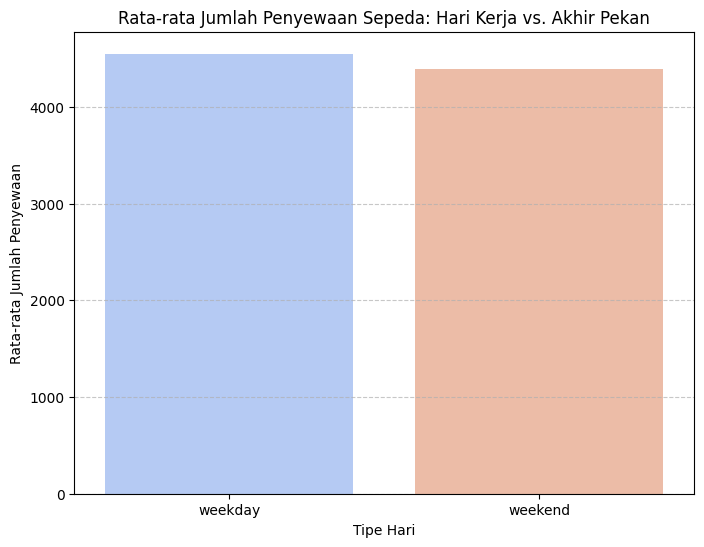

In [34]:
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'weekend' if x in ['saturday', 'sunday'] else 'weekday')

plt.figure(figsize=(8, 6))
sns.barplot(x='day_type', y='count', data=df_day.groupby('day_type')['count'].mean().reset_index(), palette='coolwarm')
plt.title('Rata-rata Jumlah Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Visualisasi menunjukkan bahwa rata-rata jumlah penyewaan sepeda pada akhir pekan (weekend) cenderung lebih tinggi dibandingkan dengan hari kerja (weekday).
- Hal ini mungkin mengindikasikan bahwa penggunaan sepeda lebih banyak untuk tujuan rekreasi atau kegiatan santai selama akhir pekan, dibandingkan dengan perjalanan komuter atau keperluan lain di hari kerja.

**Insight:**
- Pola penyewaan sepeda sangat dipengaruhi oleh faktor musiman dan kondisi cuaca.
- Musim gugur (fall) dan musim panas (summer), serta cuaca cerah (clear) adalah pendorong utama peningkatan penggunaan sepeda.
- Akhir pekan juga menunjukkan permintaan yang lebih tinggi, ada kemungkinan untuk tujuan rekreasi.
- Pengguna registered cenderung lebih stabil dalam penyewaan sepeda dibandingkan pengguna casual yang lebih sensitif terhadap perubahan cuaca dan hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda oleh pelanggan?

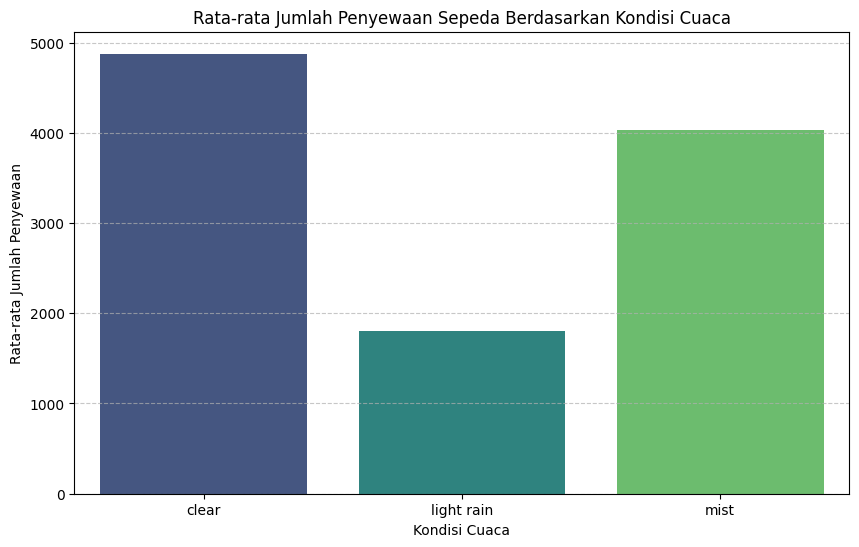

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='count', data=df_day.groupby('weather_condition')['count'].mean().reset_index(), palette='viridis')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap peningkatan atau penurunan jumlah pengguna sepeda berdasarkan tipe pengguna?

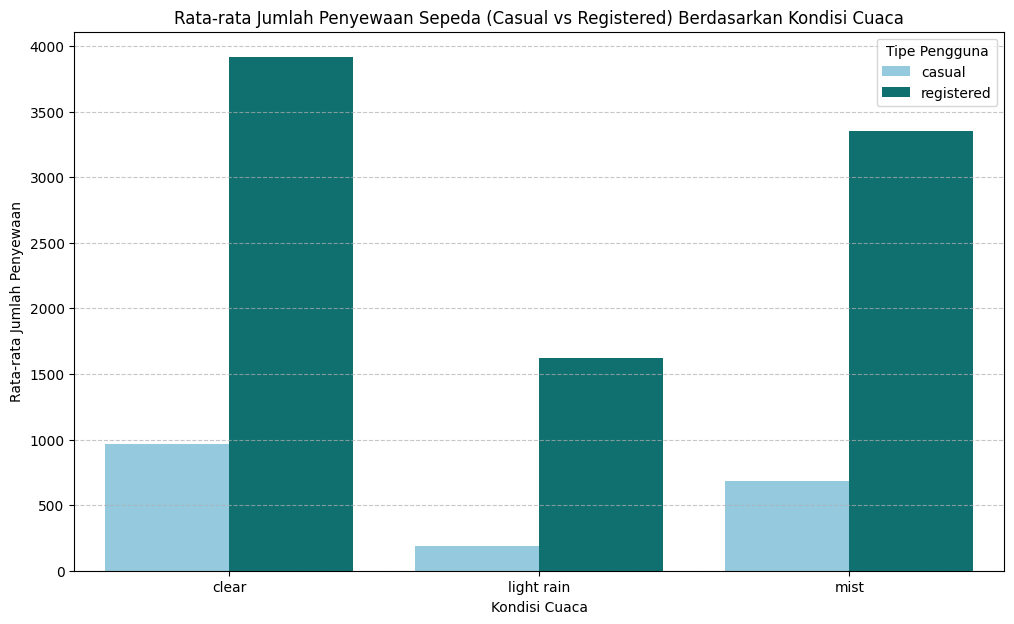

In [37]:
weather_user_counts = df_day.groupby('weather_condition')[['casual', 'registered']].mean().reset_index()
weather_user_counts_melted = weather_user_counts.melt(id_vars=['weather_condition'], var_name='user_type', value_name='average_rentals')

plt.figure(figsize=(12, 7))
sns.barplot(x='weather_condition', y='average_rentals', hue='user_type', data=weather_user_counts_melted, palette={'casual': 'skyblue', 'registered': 'teal'})
plt.title('Rata-rata Jumlah Penyewaan Sepeda (Casual vs Registered) Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight:**

Visualisasi di atas menunjukkan bagaimana kondisi cuaca mempengaruhi rata-rata jumlah penyewaan sepeda oleh pengguna casual dan registered:

- **Cuaca Cerah (Clear)**: Baik pengguna casual maupun registered menunjukkan rata-rata penyewaan tertinggi saat cuaca cerah. Ini adalah kondisi ideal untuk bersepeda, menarik banyak pengguna dari kedua kategori.

- **Cuaca Berkabut (Mist)**: Jumlah penyewaan oleh kedua tipe pengguna menurun dibandingkan cuaca cerah, tetapi masih cukup signifikan. Penurunan lebih terasa pada pengguna casual, sementara pengguna registered masih relatif stabil, menunjukkan komitmen mereka meskipun cuaca kurang optimal.

- **Hujan Ringan (Light Rain)**: Ini adalah kondisi cuaca yang paling tidak disukai oleh kedua tipe pengguna, dengan rata-rata penyewaan yang sangat rendah. Penurunan drastis ini menunjukkan bahwa hujan, bahkan yang ringan, menjadi penghalang besar bagi aktivitas bersepeda. Pengguna casual hampir tidak ada, dan pengguna registered juga mengalami penurunan yang sangat besar.

**Kesimpulan**: Kondisi cuaca cerah adalah faktor pendorong utama bagi peningkatan jumlah pengguna sepeda secara keseluruhan. Pengguna registered cenderung lebih tahan terhadap kondisi cuaca yang kurang ideal (seperti berkabut) dibandingkan pengguna casual, namun hujan ringan secara signifikan menghambat kedua kelompok.

## Conclusion

- Musim gugur (fail) dan musim panas (summer) merupakan periode puncak penyewaan sepeda. Kedua musim ini menunjukkan kepadatan penyewaan yang tinggi pada jumlah yang lebih tinggi, mengidikasikan bahwa sebagian besar hari pada musim ini memiliki volume penyewaan yang sangat banyak. Musim dingin (winter) menunjukkan distribusi penyewaan yang lebih luas, meskipun ada kepadatan pada jumlah menengah hingga tinggi, dan terdapat juga hari-hari dengan penyewaan sangat rendah yang mencerminkan kondisi cuaca yang tidak stabil. Musim semi (spring) merupakan musim dengan aktivitas penyewaan sepeda terendah, dengan kepadatan penyewaan terkonsentrasi pada jumlah yang lebih kecil.

- Cuaca cerah (clear) merupakan kondisi paling idel dengan pengguna casual dan registered menunjukkan rata-rata penyewaan tertinggi. Hal ini adalah pendorong utama peningkatan jumlah pengguna sepeda. Cuaca berkabut (mist) masih menarik penyewa, akan tetapi jumlahnya menurun dibandingkan cuaca cerah. Pengguna registered cenderung lebih stabil sementara pengguna casual lebih sensitif terhadap perubahan cuaca. Hujan ringan (light rain) sangat menghambat aktivitas penyewaan. Kondisi ini menyebabkan penurunan drastis pada kedua tipe pengguna, mengindikasikan bahwa hujan, bahkan hanya hujan ringan menjadi penghalang besar bagi aktivitas bersepeda.

Rekomendasi :  

- Manfaatkan musim gugur dan musim panas untuk memfokuskan promosi, pastikan ketersediaan armada sepeda maksimal, dan pertimbangkan program loyalitas atau paket premium. Hal ini merupakan waktu terbaik untuk memaksimalkan pendapatan.
- Meskipun rata-rata penyewaan cukup tinggi adanya hari-hari dengan penyewaan sangat rendah menunjukkan adanya sensitivitas terhadap kondisi ekstrem. Lakukan analisis lebih lanjut untuk memahami faktor pemicu hari-hari yang rendah misalnya kondisi salju parah atau suhu ekstrem dan pertimbangkan strategi mitigasi seperti penawaran khusus pada hari yang kurang ekstrem atau penyesuaian operasional.  
- Karena musim semi adalah periode terendah, pertimbangkan promosi 'early bird'. Acara komunitas sepeda, atau paket penyewaan jangka panjang untuk mendorong minat kembali setelah musim dingin.
- Pada hari-hari dengan perkiran cuaca cerah, aktifkan promosi 'flash sale' atau notifikasi khusus untuk mendorong pengguna. Saat cuaca berkabut, fokuskan pada pengguna 'registered' yang lebih stabil dengan insentif kecil.
- Promosikan penggunaan sepeda untuk kegiatan rekreasi, wisata keluarga, atau jalur sepeda populer. Pertimbangkan paket akhir pekan atau acara khusus keluarga.
- Kemudian kembangkan program langganan bulanan atau bulanan atau tahunan untuk pengguna 'registered', tawarkan rute yang efisien untuk perjalanan kantor dan kerja sama dengan perusahaan untuk program sehat karyawan. Dan hal tersebut akan menjaga stabilitas pendapatan.


## Menyimpan Dataset yang Sudah Dibersihkan

In [65]:
df_day.to_csv('clean_bike_rental_day.csv', index=False)

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [48]:
current_date = df_day['dateday'].max()
print(f"Tanggal terbaru dalam dataset adalah: {current_date}")

Tanggal terbaru dalam dataset adalah: 2012-12-31 00:00:00


In [49]:
df_day['Recency'] = (current_date - df_day['dateday']).dt.days
print("Recency berhasil dihitung.")

Recency berhasil dihitung.


In [50]:
df_day['R_Score'] = pd.qcut(df_day['Recency'], 5, labels=False, duplicates='drop')
df_day['R_Score'] = 5 - df_day['R_Score']
print("R_Score berhasil dihitung dan ditetapkan.")

R_Score berhasil dihitung dan ditetapkan.


**Menghitung Frequency and Monetary Scores**


In [51]:
df_day['F_Score'] = pd.qcut(df_day['count'], 5, labels=False, duplicates='drop') + 1
df_day['M_Score'] = pd.qcut(df_day['count'], 5, labels=False, duplicates='drop') + 1
print("F_Score and M_Score berhasil dihitung dan ditetapkan")

F_Score and M_Score berhasil dihitung dan ditetapkan


**Kombinasi RFM Scores dan Segment Days**


In [52]:
df_day['RFM_Score'] = df_day['R_Score'].astype(str) + df_day['F_Score'].astype(str) + df_day['M_Score'].astype(str)
print("RFM_Score berhasil dihitung.")

RFM_Score berhasil dihitung.


In [53]:
def rfm_segment(row):
    r_score = row['R_Score']
    f_score = row['F_Score']
    m_score = row['M_Score']

    if r_score >= 4 and f_score >= 4 and m_score >= 4:
        return 'Best Days'
    elif r_score >= 3 and f_score >= 3 and m_score >= 3:
        return 'Good Days'
    elif r_score >= 2 and f_score >= 2 and m_score >= 2:
        return 'Regular Days'
    elif r_score <= 2 and f_score >= 3 and m_score >= 3:
        return 'Needs Attention'
    else:
        return 'Lost Days'

df_day['Segment'] = df_day.apply(rfm_segment, axis=1)
print("Day segments ('Segment' column) berhasil dibuat.")

Day segments ('Segment' column) berhasil dibuat.


In [54]:
segment_counts = df_day['Segment'].value_counts()
print("Count of days in each segment:")
print(segment_counts)

Count of days in each segment:
Segment
Best Days          249
Regular Days       231
Lost Days          172
Good Days           53
Needs Attention     26
Name: count, dtype: int64


**Visualisasi Segmen RFM**

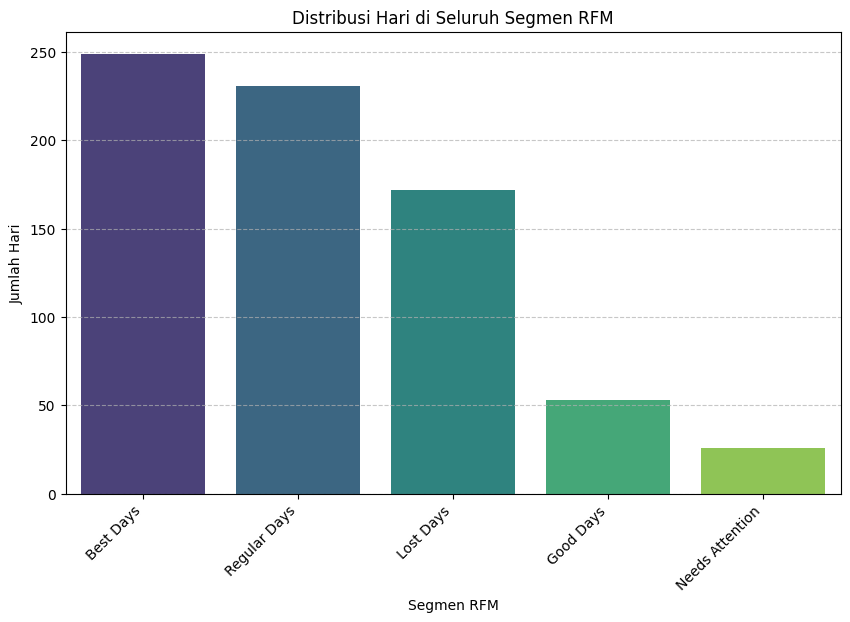

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribusi Hari di Seluruh Segmen RFM')
plt.xlabel('Segmen RFM')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insight:

*   Perhitungan Recency (R) Score : Skor recency dihitung dengan menentukan jumlah hari yang telah berlalu sejak tanggal terbaru dalam dataset yaitu 31 Desember 2012 untuk setiap hari. Hari yang telah berlalu ini kemudian diberi peringkat kuantil menjadi 5 skor, yang menunjukkan hari-hari yang paling baru.
*   Perhitungan Frequency (F) dan Monetary (M) Score : Skor frequency dan monetary diturunkan dari total jumlah penyewaan (`count`) untuk setiap hari. Jumlah penyewaan diberi peringkat kuantil menjadi 5 skor, yang mewakili hari-hari dengan frekuensi penyewaan tertinggi.
*   Kombinasi RFM Score : `RFM_Score` dibuat dengan menggabungkan skor R, F, dan M untuk setiap hari.
*   Distribusi Segmen : Analisis mengidentifikasi distribusi hari-hari di seluruh segmen sebagai berikut :  
    *   Best Days : 249 hari.
    *   Regular Days : 231 hari.
    *   Lost Days : 172 hari.
    *   Good Days : 53 hari.
    *   Needs Attention : 26 hari.


## Clustering

In [58]:
# 1. Binning berdasarkan Suhu (temperature)
# Menggunakan rentang suhu yang sudah dinormalisasi (0-1)
# contoh :
# 0.0-0.2: Dingin (Cold)
# 0.2-0.5: Sedang (Mild)
# 0.5-0.7: Hangat (Warm)
# > 0.7: Panas (Hot)

df_day['temp_category'] = pd.cut(
    df_day['temperature'],
    bins=[0, 0.2, 0.5, 0.7, 1.0],
    labels=['Cold', 'Mild', 'Warm', 'Hot'],
    include_lowest=True
)

print("Distribusi kategori suhu:")
print(df_day['temp_category'].value_counts())

# Tampilkan beberapa baris dengan kategori suhu baru
display(df_day[['temperature', 'temp_category']].head())

Distribusi kategori suhu:
temp_category
Mild    333
Warm    235
Hot     129
Cold     34
Name: count, dtype: int64


,temperature,temp_category
0,0.344167,Mild
1,0.363478,Mild
2,0.196364,Cold
3,0.200000,Cold
4,0.226957,Mild


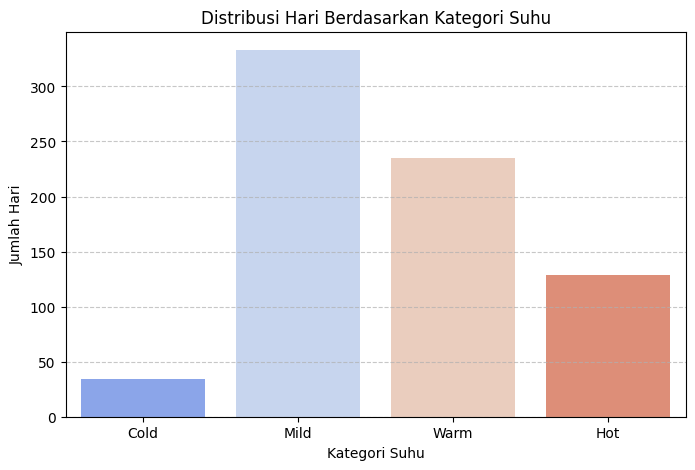

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(x='temp_category', data=df_day, palette='coolwarm', order=['Cold', 'Mild', 'Warm', 'Hot'])
plt.title('Distribusi Hari Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Hari')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
# 2. Binning berdasarkan Kelembaban (humidity)
# Menggunakan rentang kelembaban yang sudah dinormalisasi (0-1)
# Contoh :
# 0.0-0.33: Rendah (Low Humidity)
# 0.33-0.66: Sedang (Medium Humidity)
# > 0.66: Tinggi (High Humidity)

df_day['hum_category'] = pd.cut(
    df_day['humidity'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Low Humidity', 'Medium Humidity', 'High Humidity'],
    include_lowest=True
)

print("Distribusi kategori kelembaban:")
print(df_day['hum_category'].value_counts())

# Tampilkan beberapa baris dengan kategori kelembaban baru
display(df_day[['humidity', 'hum_category']].head())

Distribusi kategori kelembaban:
hum_category
Medium Humidity    415
High Humidity      304
Low Humidity        12
Name: count, dtype: int64


,humidity,hum_category
0,0.805833,High Humidity
1,0.696087,High Humidity
2,0.437273,Medium Humidity
3,0.590435,Medium Humidity
4,0.436957,Medium Humidity


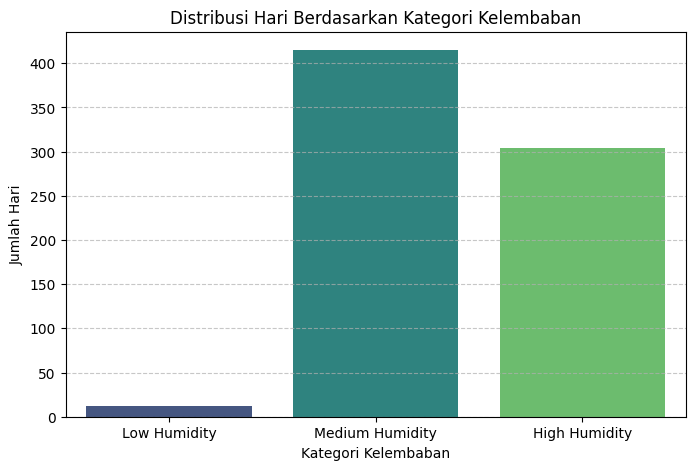

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(x='hum_category', data=df_day, palette='viridis', order=['Low Humidity', 'Medium Humidity', 'High Humidity'])
plt.title('Distribusi Hari Berdasarkan Kategori Kelembaban')
plt.xlabel('Kategori Kelembaban')
plt.ylabel('Jumlah Hari')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
# 3. Manual Grouping / Binning berdasarkan Jumlah Penyewaan (count)
# Membuat kategori berdasarkan kuartil atau rentang yang lebih spesifik.
# Contoh:
# Q1 (0-25%): Low Rentals
# Q2 (25-50%): Medium Rentals
# Q3 (50-75%): High Rentals
# Q4 (75-100%): Very High Rentals

# Mendapatkan batas kuartil
rental_bins = df_day['count'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
rental_labels = ['Low Rentals', 'Medium Rentals', 'High Rentals', 'Very High Rentals']

df_day['rental_volume_category'] = pd.cut(
    df_day['count'],
    bins=rental_bins,
    labels=rental_labels,
    include_lowest=True
)

print("Distribusi kategori volume penyewaan:")
print(df_day['rental_volume_category'].value_counts())

# Tampilkan beberapa baris dengan kategori volume penyewaan baru
display(df_day[['count', 'rental_volume_category']].head())

Distribusi kategori volume penyewaan:
rental_volume_category
Low Rentals          183
Medium Rentals       183
Very High Rentals    183
High Rentals         182
Name: count, dtype: int64


,count,rental_volume_category
0,985,Low Rentals
1,801,Low Rentals
2,1349,Low Rentals
3,1562,Low Rentals
4,1600,Low Rentals


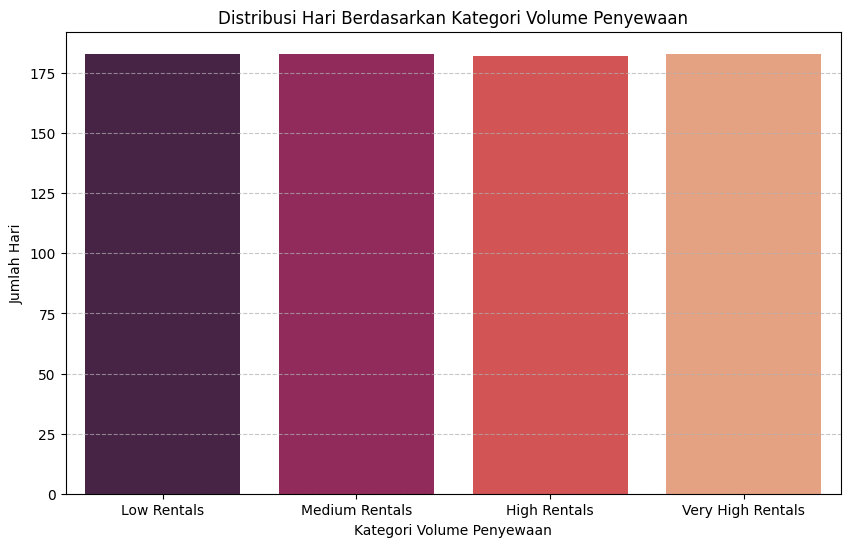

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rental_volume_category', data=df_day, palette='rocket', order=['Low Rentals', 'Medium Rentals', 'High Rentals', 'Very High Rentals'])
plt.title('Distribusi Hari Berdasarkan Kategori Volume Penyewaan')
plt.xlabel('Kategori Volume Penyewaan')
plt.ylabel('Jumlah Hari')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

*   **Kategori Suhu**: Visualisasi menunjukkan bahwa sebagian besar hari berada dalam kategori 'Mild' dan 'Warm', yang mengindikasikan bahwa penyewaan sepeda cenderung sering terjadi pada kondisi suhu yang tidak terlalu dingin atau panas.
*   **Kategori Kelembaban**: Dominasi ada pada kategori 'Medium Humidity' dan 'High Humidity'. Ini berarti sebagian besar hari memiliki tingkat kelembaban sedang hingga tinggi.
*   **Kategori Volume Penyewaan**: Jumlah hari terdistribusi cukup merata di antara kategori 'Low Rentals', 'Medium Rentals', 'High Rentals', dan 'Very High Rentals', meskipun ada sedikit perbedaan. Hal ini menunjukkan bahwa ada variasi signifikan dalam volume penyewaan dari hari ke hari, mencerminkan adanya periode sepi dan ramai.